# Mouse Maze Simulation

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import gym
import gym_maze
import random
from IPython.display import Image
import pygame
import time
import seaborn as sns
sns.set()

In [2]:
class QlearningMouse:
    """
    The QlearningMouse object is a reinforcement learning 
    mouse agent that uses Q-learning to work its way through 
    an Open-ai maze to get to the end of the maze where the 
    reward (the hypothetical cheese) is. 
    
    This object has attributes such as state, decay factor, 
    discount rate, exploration rate and a Q-table. 
    It also has methods for stepping (deciding what the next 
    action is using the epsilon-greedy approach) and updating 
    the Q-table, as well as initializing a new episode. 
    
    This object uses a decaying epsilon and learning rate, 
    which improves its performance and makes it converge 
    faster. 
    """

    def __init__(self,
                 maze_width,
                 maze_height,
                 epsilon=0.9,
                 learning_rate=0.9,
                 decay_factor=10,
                 gamma=0.90):

        self.epsilon = epsilon
        self.state = (0., 0.)
        self.learning_rate = learning_rate
        self.decay_factor = decay_factor
        self.gamma = gamma
        self.episode = 0

        # initializing q-table
        self.q_table = {}
        for i in range(maze_width):
            for j in range(maze_height):
                self.q_table[(i, j)] = [0., 0., 0., 0.]

    def step(self):
        """
        Returns the next action, exploiting (1-epsilon)% of the time and
        exploring epsilon% of the time.
        """
        if random.random() < self.decayed_epsilon():
            return env.action_space.sample()
        else:
            action_idx = np.argmax(
                self.q_table[(self.state[0], self.state[1])])
            return int(action_idx)

    def decayed_epsilon(self):
        """
        Given the number of episodes, returns epsilon.
        Decayed epsilon is used because it makes the convergance much 
        faster. The epsilon is high at first, making the agent explore 
        more and it decreases as the number of episodes increase and the 
        agent exploits more.
        """
        # exploration rate is never smaller than 0.001 and never greater than 0.9
        return max(0.001, min(0.9, 1.0 - np.log10(self.episode/self.decay_factor)))

    def decayed_learning_rate(self):
        """
        Given the number of episodes, returns learning rate. 
        Similar to the decayed_epsilon() function, this function returns 
        the learning rate depending on the number of episodes. The learning 
        rate is high at first and it decreases as the number of episodes 
        increase, resulting in better learning performance. 
        """
        # learning rate is never smaller than 0.2 and never greater than 0.9
        return max(0.2, min(0.9, 1.0 - np.log10(self.episode/self.decay_factor)))

    def update(self, action, observation, reward):
        """
        Updates q-table based on an action, observation and reward. 
        """
        best_q = np.amax(
            self.q_table[(int(observation[0]), int(observation[1]))])

        q_table_key = (self.state[0], self.state[1])
        
        # updating Q-table using the Q-learning formula
        self.q_table[q_table_key][action] += \
            self.decayed_learning_rate() * (reward + self.gamma * (best_q) -
                                            self.q_table[q_table_key][action])

        self.state = [int(observation[0]), int(observation[1])]

    def init_new_episode(self, init_state):
        """
        Initiates a new episode for learning.
        """
        self.episode += 1
        self.state = [int(init_state[0]), int(init_state[1])]

In [3]:
maze_episodes = {}
def find_cheese(env, agent, episodes=2000, steps=10000, should_render=False):
    """
    Given a gym environment and an agent object, trains a mouse to find cheese.
    
    Should_render: should be set to 'True' if you want to view the the maze.
    The kernel should be reset after each time it runs.
    """
    env_height = env.observation_space.high[0] + 1
    env_width = env.observation_space.high[1] + 1
    
    try:
        start = time.time_ns()
        number_of_steps = []
        for i_episode in range(episodes):
            print(f"Starting episode {i_episode}")

            observation = env.reset()
            agent.init_new_episode(observation)
            for t in range(steps):
                
                if should_render:
                    env.render()
                    
                action = agent.step()
                observation, reward, done, info = env.step(action)
                agent.update(action, observation, reward)
                
                if done:
                    print(f"Episode finished after {t+1} timesteps")
                    number_of_steps.append(t+1)
                    break
            
            # if the number of steps hasn't changed for the past 10 episodes, the optimal solution has been found
            if len(number_of_steps) > 10 and len(set(number_of_steps[-10:])) == 1: 
                end = time.time_ns()
                
                maze_episodes[(env_height, env_width)] = {
                    "steps": number_of_steps,
                    "num_episodes": i_episode,
                    "execution_time_ms": (end - start) // 1_000_000
                }
                
                break
    finally:
        env.close()
        pygame.display.quit()
        pygame.quit()
        env.close()

In [4]:
mazes = [
    'maze-v0',
    'maze-random-3x3-v0',
    'maze-random-5x5-v0',
    'maze-sample-10x10-v0',
    'maze-random-10x10-v0',
    'maze-random-20x20-plus-v0',
    'maze-random-30x30-plus-v0'
]

### Results for 'maze-random-3x3-v0'

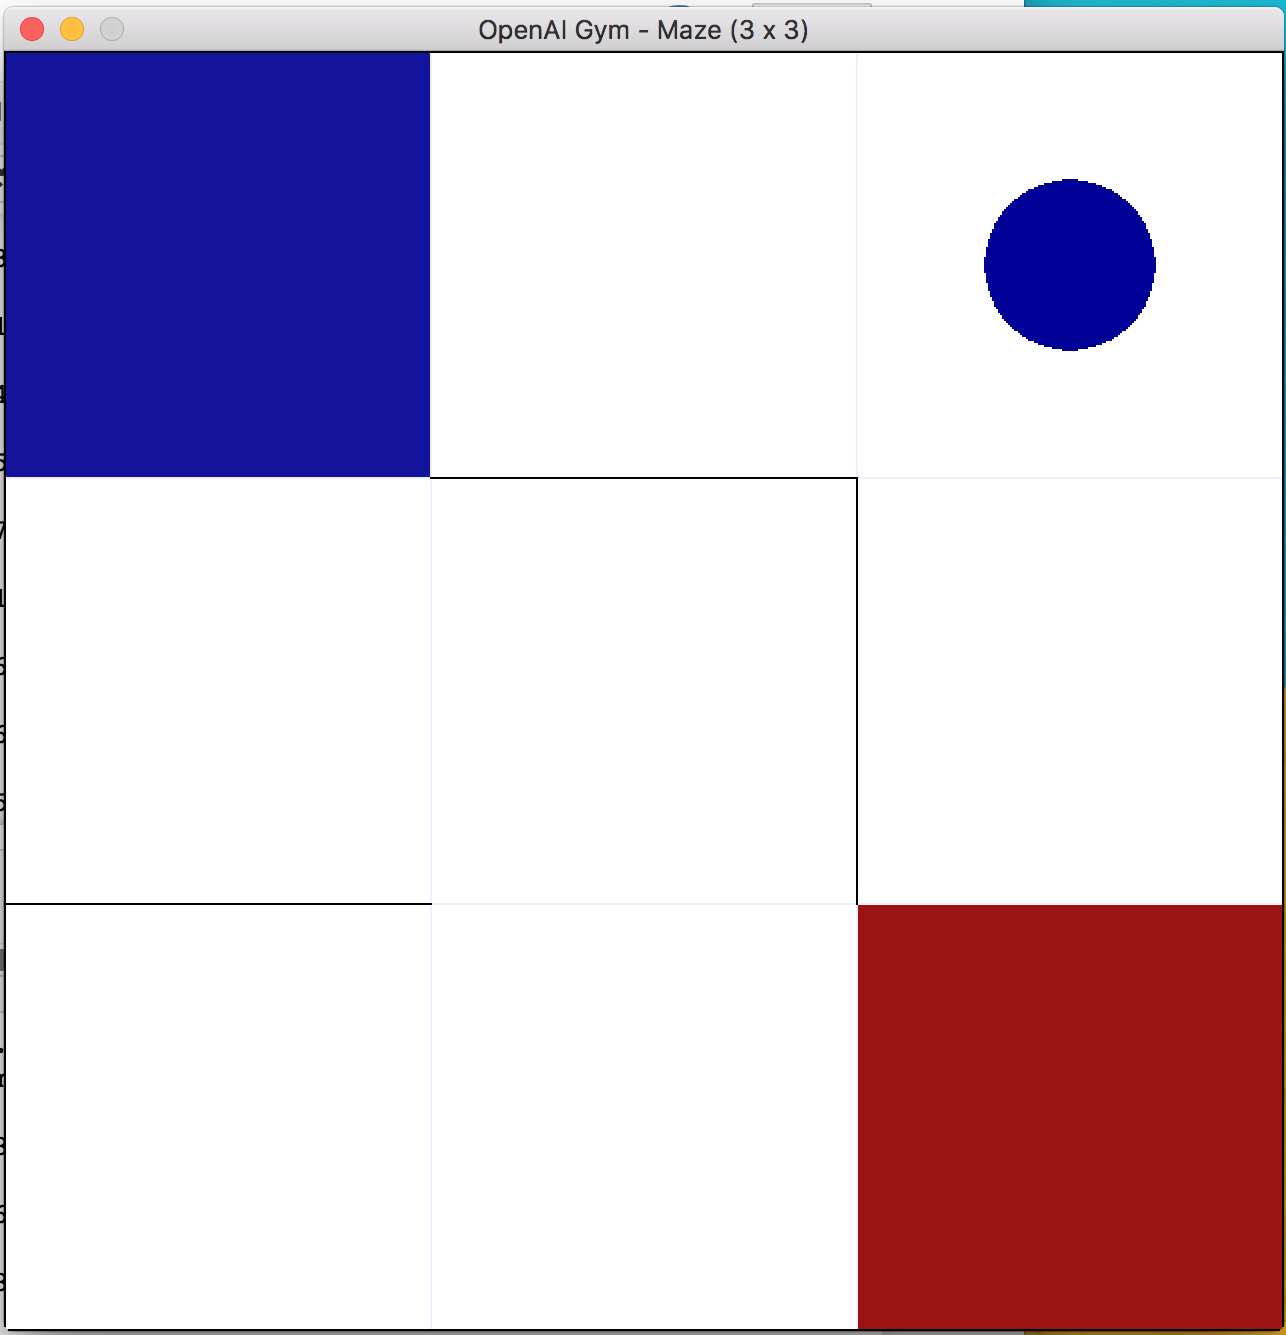

In [5]:
Image(filename='pictures/2.png',width=400, height=400)

In [6]:
env = gym.make(mazes[1])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 107 timesteps
Starting episode 1
Episode finished after 7 timesteps
Starting episode 2
Episode finished after 12 timesteps
Starting episode 3
Episode finished after 85 timesteps
Starting episode 4
Episode finished after 9 timesteps
Starting episode 5
Episode finished after 35 timesteps
Starting episode 6
Episode finished after 28 timesteps
Starting episode 7
Episode finished after 5 timesteps
Starting episode 8
Episode finished after 9 timesteps
Starting episode 9
Episode finished after 10 timesteps
Starting episode 10
Episode finished after 19 timesteps
Starting episode 11
Episode finished after 9 timesteps
Starting episode 12
Episode finished after 24 timesteps
Starting episode 13
Episode finished after 38 timesteps
Starting episode 14
Episode finished after 25 timesteps
Starting episode 15
Episode finished after 12 timesteps
Starting episode 16
Episode finished after 8 timesteps
Starting episode 17
Episode finished after 7 timesteps
Starting

### Results for 'maze-random-5x5-v0'

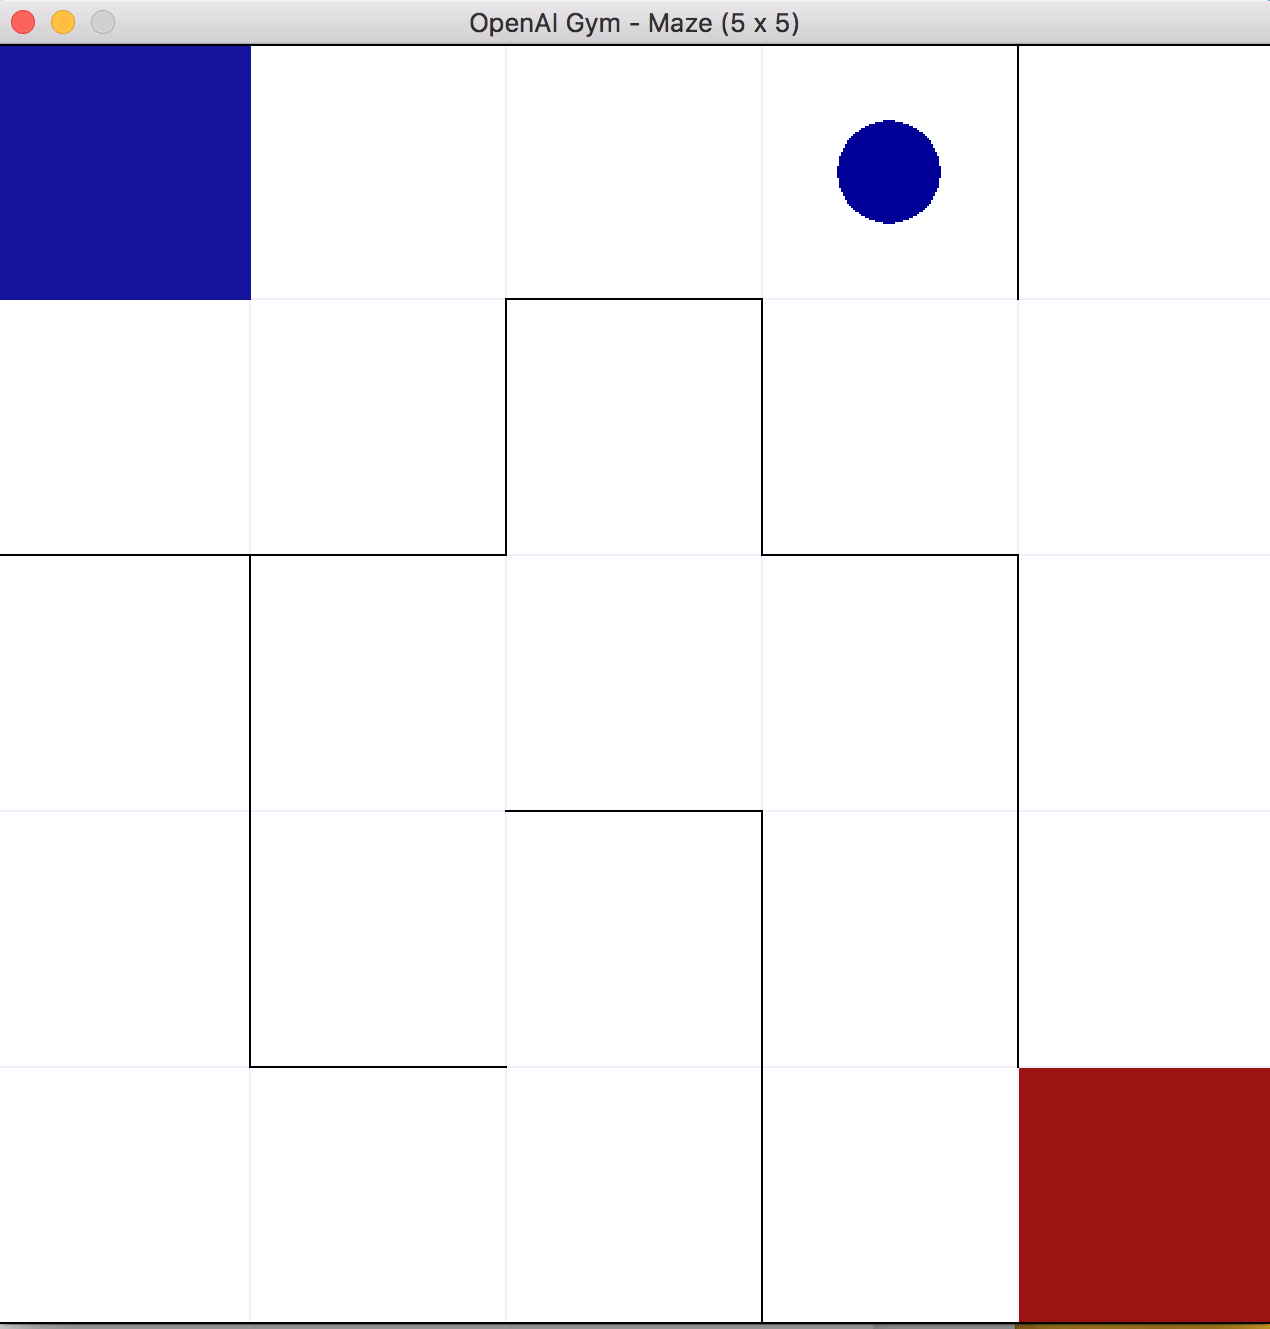

In [7]:
Image(filename='pictures/3.png',width=400, height=400)

In [8]:
env = gym.make(mazes[2])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 583 timesteps
Starting episode 1
Episode finished after 68 timesteps
Starting episode 2
Episode finished after 44 timesteps
Starting episode 3
Episode finished after 159 timesteps
Starting episode 4
Episode finished after 243 timesteps
Starting episode 5
Episode finished after 185 timesteps
Starting episode 6
Episode finished after 132 timesteps
Starting episode 7
Episode finished after 54 timesteps
Starting episode 8
Episode finished after 30 timesteps
Starting episode 9
Episode finished after 47 timesteps
Starting episode 10
Episode finished after 66 timesteps
Starting episode 11
Episode finished after 46 timesteps
Starting episode 12
Episode finished after 45 timesteps
Starting episode 13
Episode finished after 55 timesteps
Starting episode 14
Episode finished after 40 timesteps
Starting episode 15
Episode finished after 77 timesteps
Starting episode 16
Episode finished after 23 timesteps
Starting episode 17
Episode finished after 22 timeste

### Results for 'maze-sample-10x10-v0'

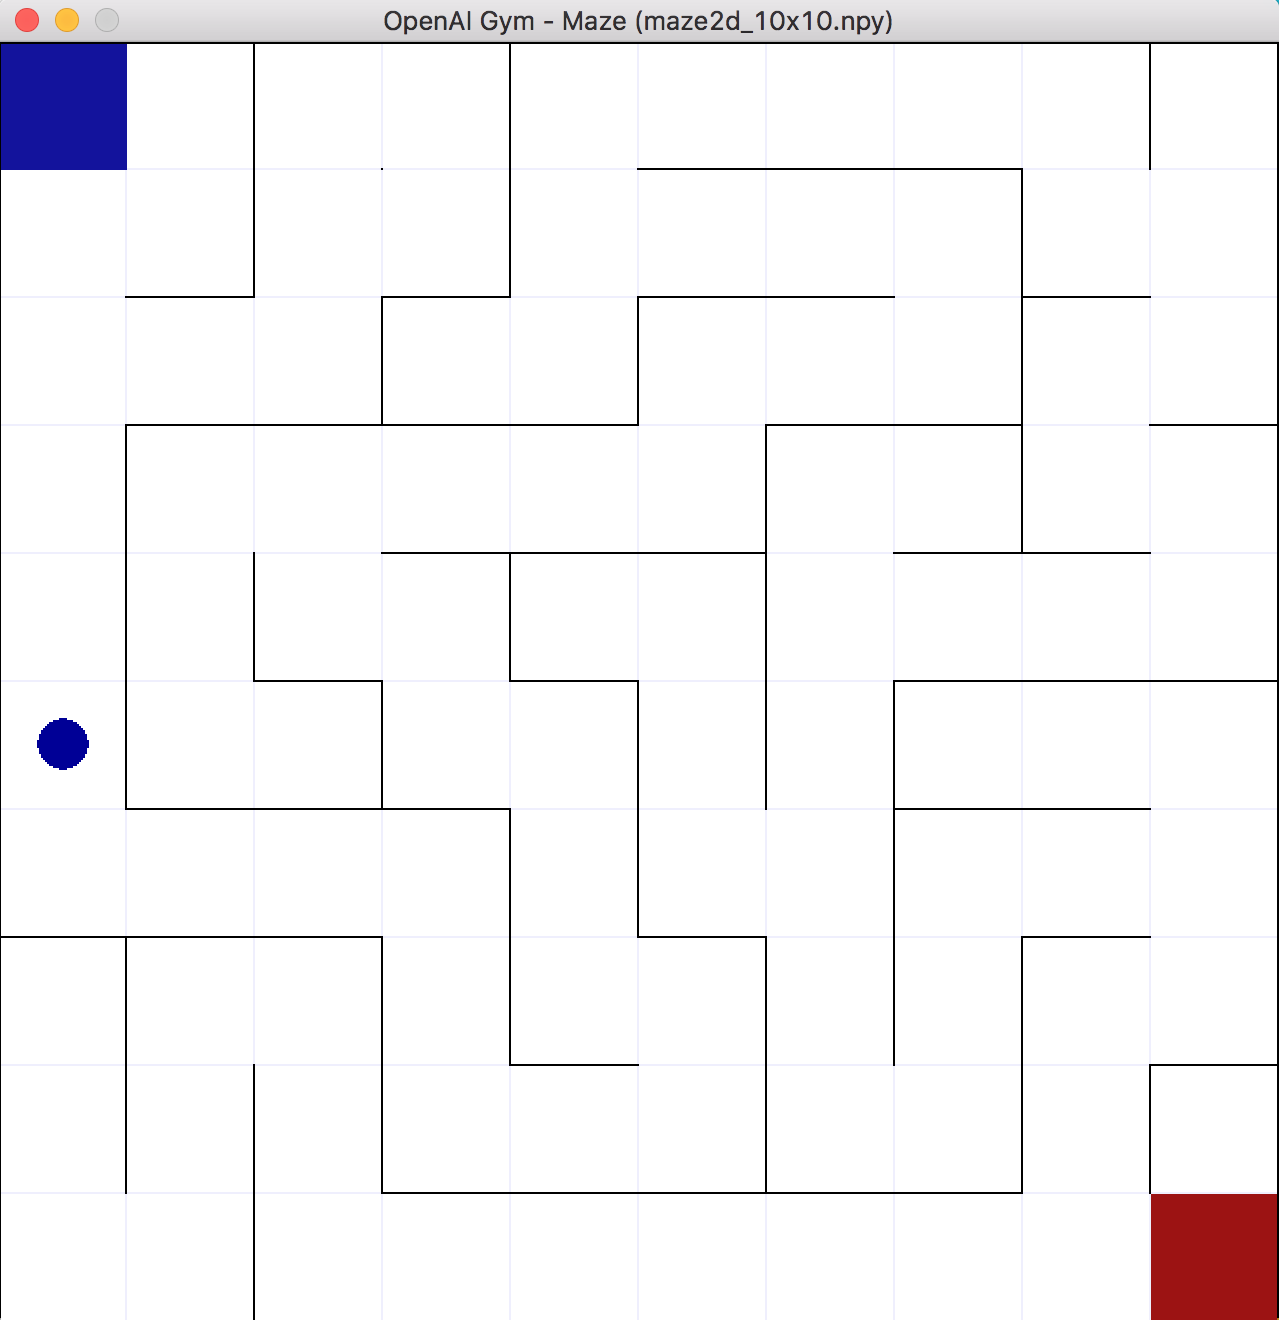

In [9]:
Image(filename='pictures/4.png',width=400, height=400)

In [10]:
env = gym.make(mazes[3])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 2844 timesteps
Starting episode 1
Episode finished after 6717 timesteps
Starting episode 2
Episode finished after 2072 timesteps
Starting episode 3
Episode finished after 1853 timesteps
Starting episode 4
Episode finished after 1153 timesteps
Starting episode 5
Episode finished after 1022 timesteps
Starting episode 6
Episode finished after 1246 timesteps
Starting episode 7
Episode finished after 841 timesteps
Starting episode 8
Episode finished after 1137 timesteps
Starting episode 9
Episode finished after 1276 timesteps
Starting episode 10
Episode finished after 665 timesteps
Starting episode 11
Episode finished after 1018 timesteps
Starting episode 12
Episode finished after 837 timesteps
Starting episode 13
Episode finished after 462 timesteps
Starting episode 14
Episode finished after 561 timesteps
Starting episode 15
Episode finished after 484 timesteps
Starting episode 16
Episode finished after 613 timesteps
Starting episode 17
Episode fin

### Results for 'maze-random-10x10-v0'

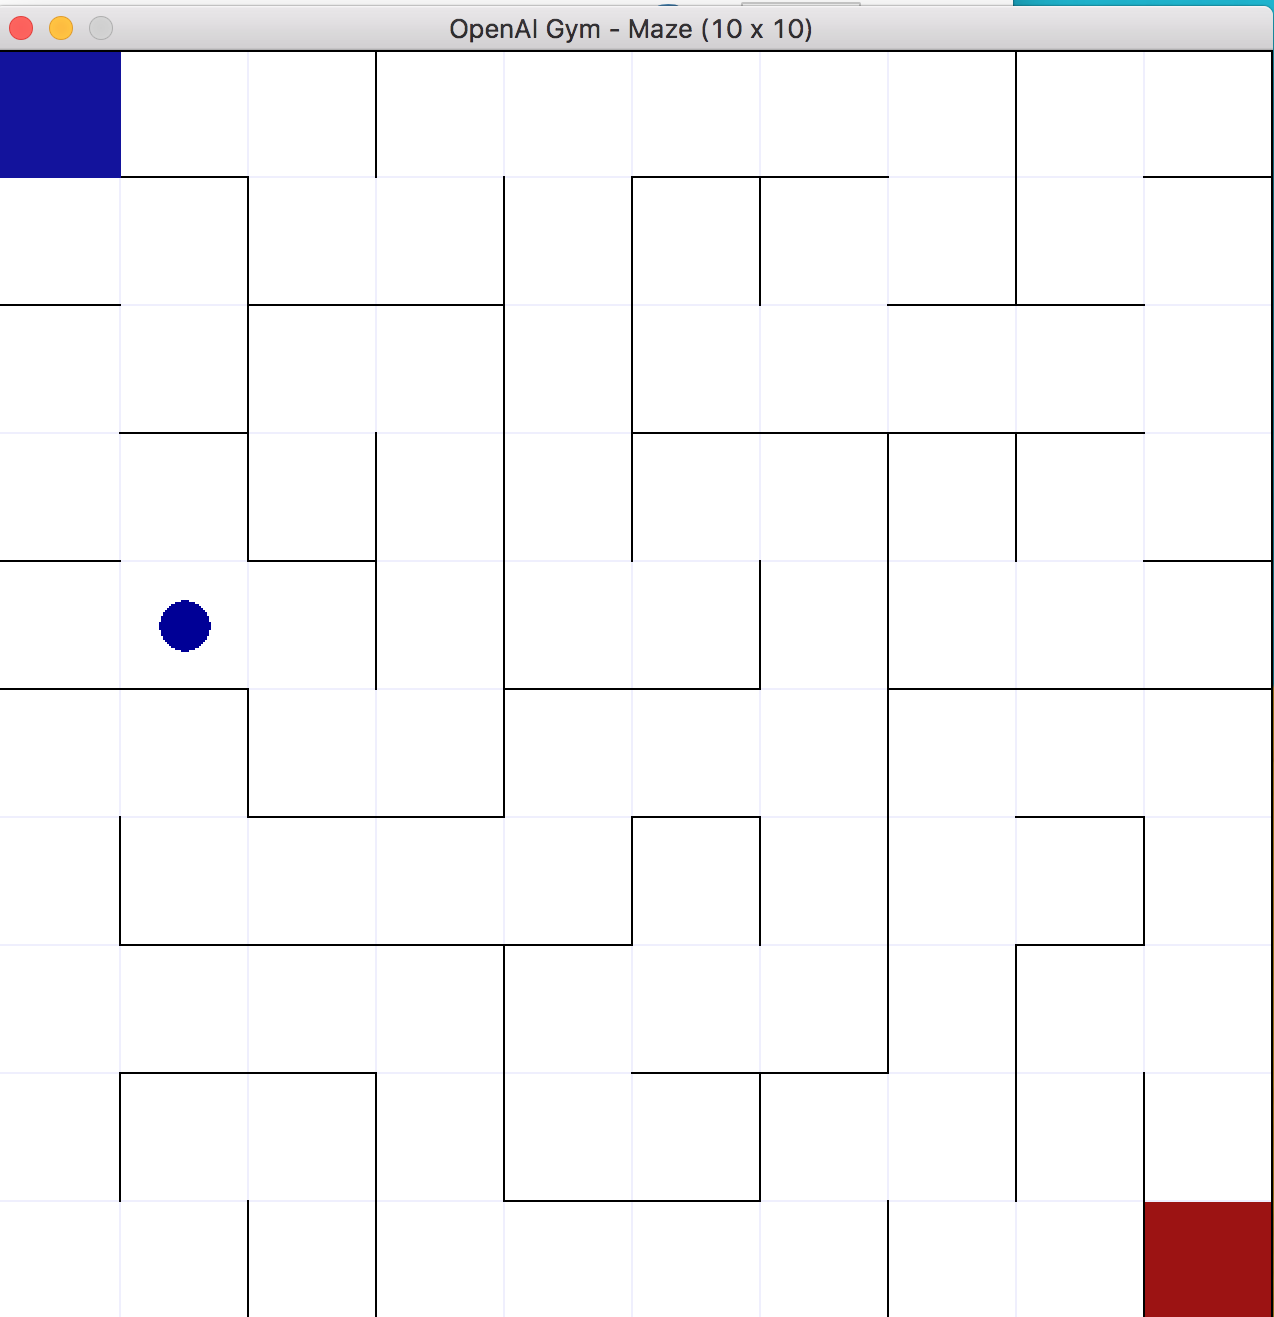

In [11]:
Image(filename='pictures/5.png',width=400, height=400)

In [12]:
env = gym.make(mazes[4])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 1302 timesteps
Starting episode 1
Episode finished after 3520 timesteps
Starting episode 2
Episode finished after 4165 timesteps
Starting episode 3
Episode finished after 243 timesteps
Starting episode 4
Episode finished after 651 timesteps
Starting episode 5
Episode finished after 437 timesteps
Starting episode 6
Episode finished after 863 timesteps
Starting episode 7
Episode finished after 255 timesteps
Starting episode 8
Episode finished after 547 timesteps
Starting episode 9
Episode finished after 878 timesteps
Starting episode 10
Episode finished after 241 timesteps
Starting episode 11
Episode finished after 348 timesteps
Starting episode 12
Episode finished after 750 timesteps
Starting episode 13
Episode finished after 393 timesteps
Starting episode 14
Episode finished after 128 timesteps
Starting episode 15
Episode finished after 94 timesteps
Starting episode 16
Episode finished after 136 timesteps
Starting episode 17
Episode finished af

### Results for 'maze-sample-20x20-plus-v0'

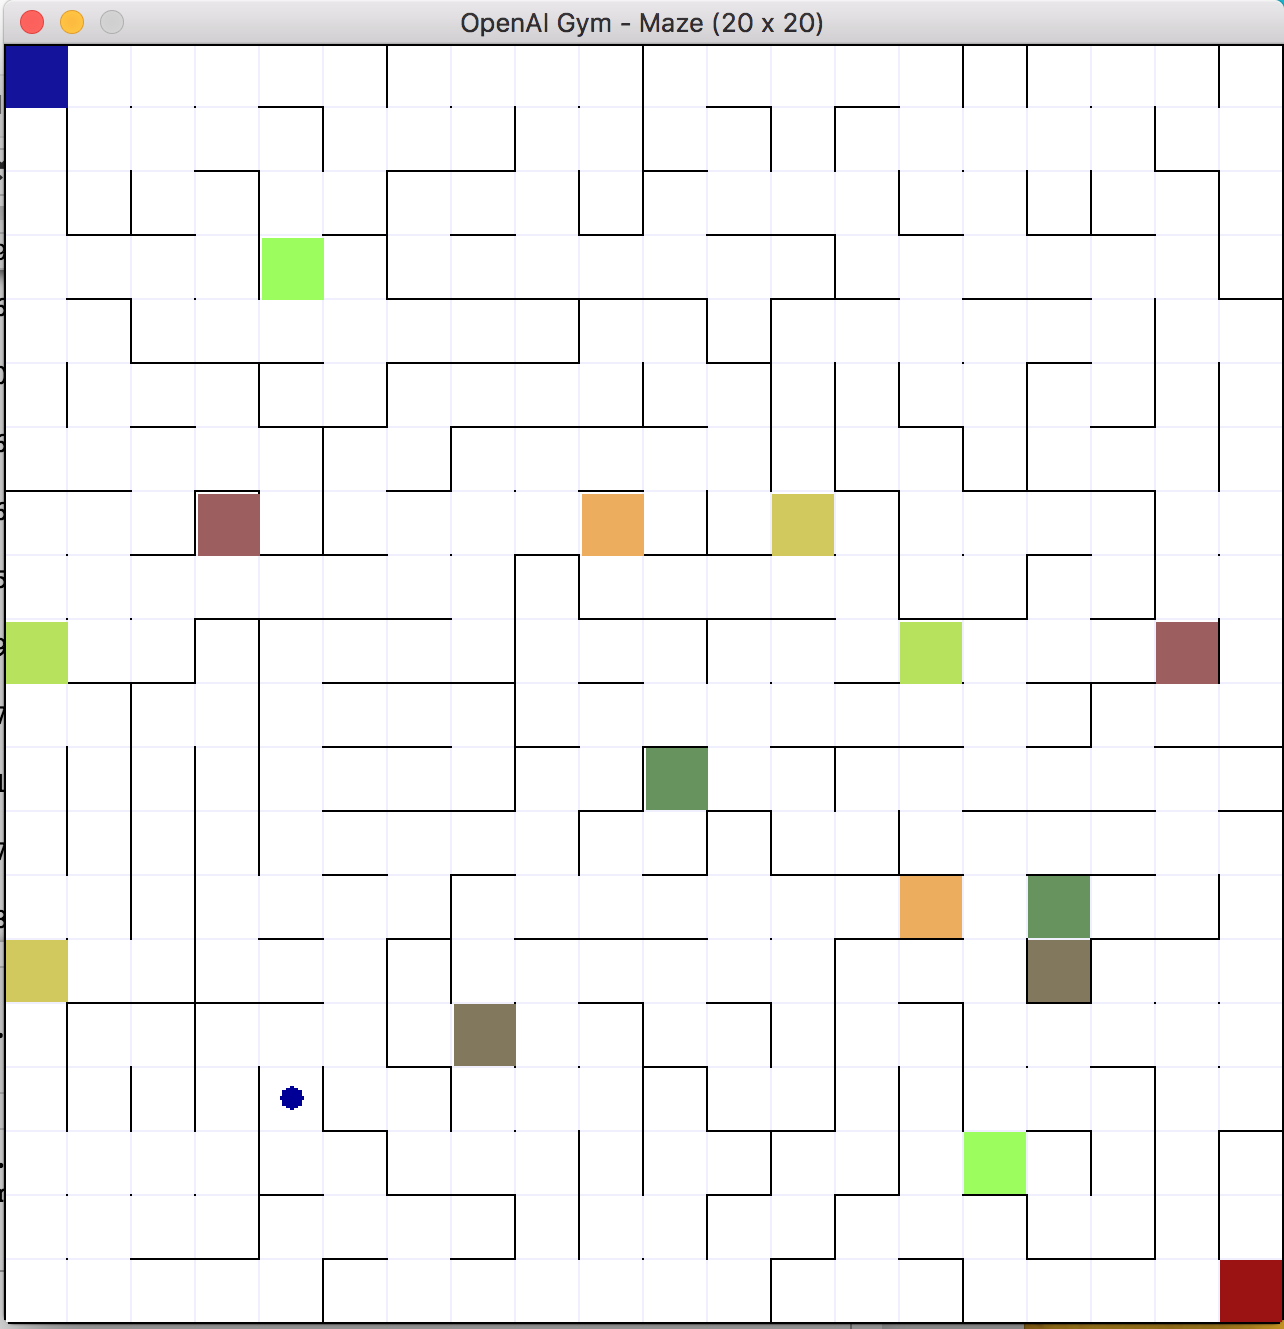

In [13]:
Image(filename='pictures/6.png',width=400, height=400)

In [14]:
env = gym.make(mazes[5])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Episode finished after 2818 timesteps
Starting episode 1
Episode finished after 3336 timesteps
Starting episode 2
Episode finished after 1147 timesteps
Starting episode 3
Episode finished after 707 timesteps
Starting episode 4
Episode finished after 4364 timesteps
Starting episode 5
Episode finished after 1422 timesteps
Starting episode 6
Episode finished after 1422 timesteps
Starting episode 7
Episode finished after 1352 timesteps
Starting episode 8
Episode finished after 1578 timesteps
Starting episode 9
Episode finished after 2780 timesteps
Starting episode 10
Episode finished after 1276 timesteps
Starting episode 11
Episode finished after 1365 timesteps
Starting episode 12
Episode finished after 2610 timesteps
Starting episode 13
Episode finished after 909 timesteps
Starting episode 14
Episode finished after 331 timesteps
Starting episode 15
Episode finished after 713 timesteps
Starting episode 16
Episode finished after 524 timesteps
Starting episode 17
Episode f

### Results for 'maze-sample-30x30-plus-v0'

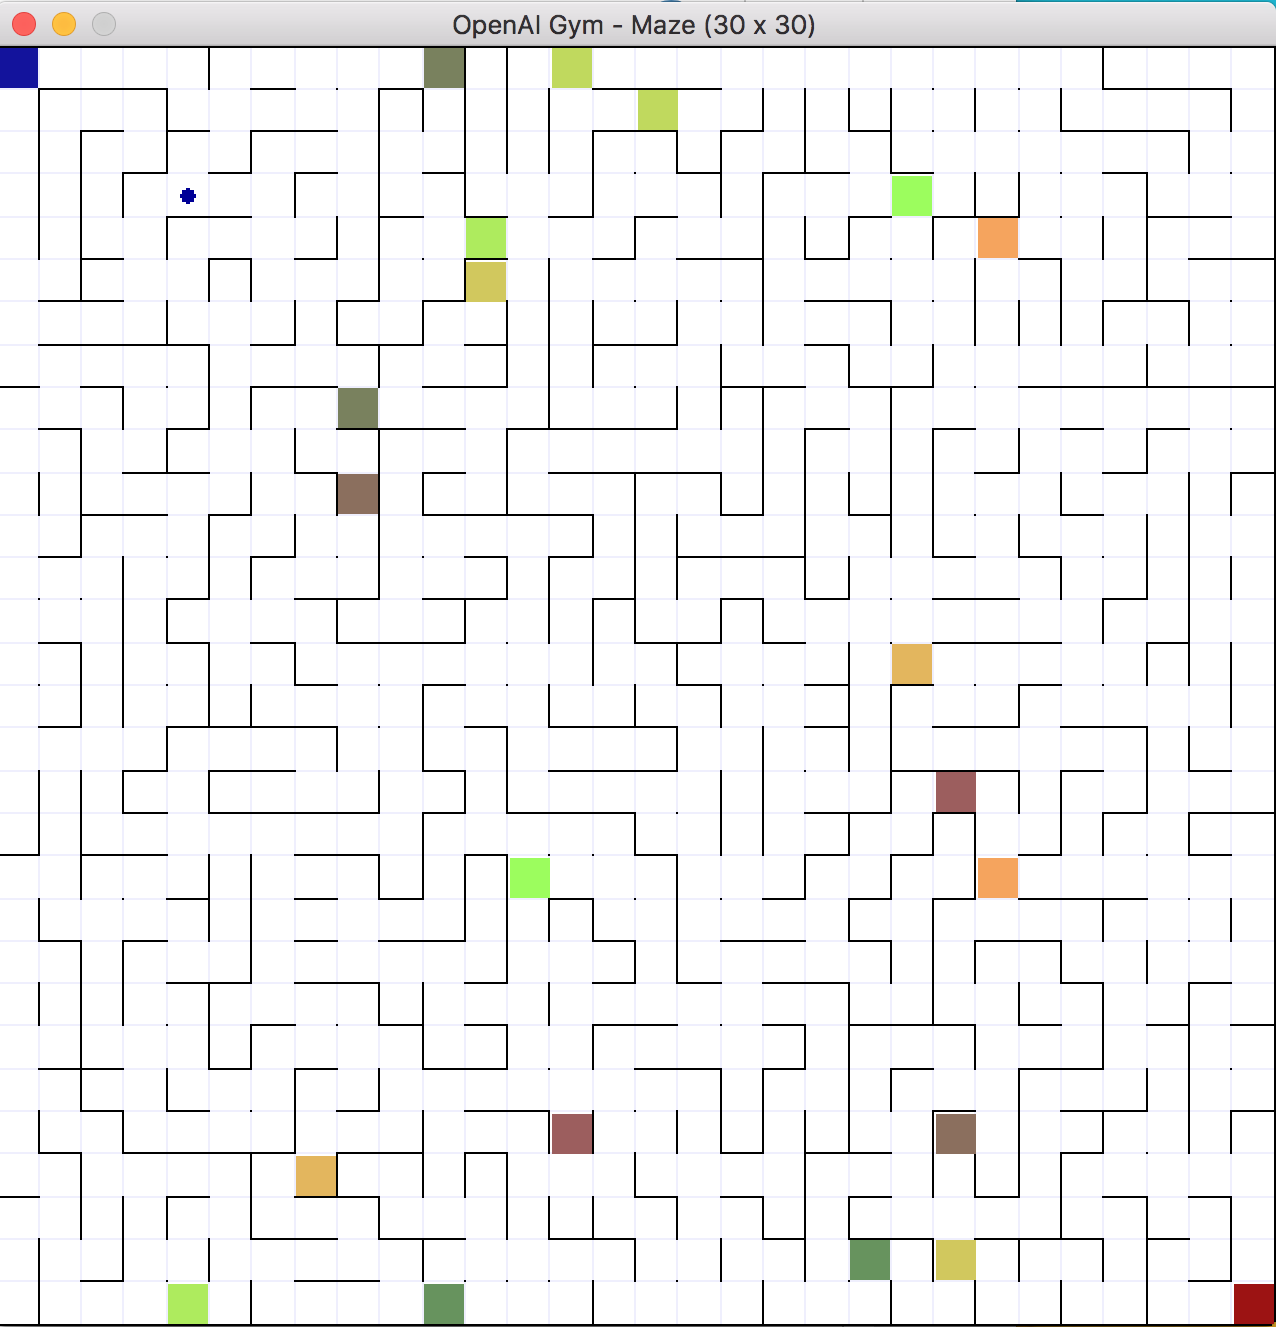

In [15]:
Image(filename='pictures/7.png',width=400, height=400)

In [16]:
env = gym.make(mazes[6])
env_height = env.observation_space.high[0] + 1
env_width = env.observation_space.high[1] + 1
agent = QlearningMouse(env_height, env_width)
find_cheese(env, agent, should_render=False)

Starting episode 0
Starting episode 1
Starting episode 2
Starting episode 3
Starting episode 4
Episode finished after 3988 timesteps
Starting episode 5
Starting episode 6
Starting episode 7
Starting episode 8
Episode finished after 2136 timesteps
Starting episode 9
Episode finished after 3708 timesteps
Starting episode 10
Starting episode 11
Starting episode 12
Episode finished after 2317 timesteps
Starting episode 13
Episode finished after 4162 timesteps
Starting episode 14
Episode finished after 2484 timesteps
Starting episode 15
Episode finished after 1612 timesteps
Starting episode 16
Episode finished after 3082 timesteps
Starting episode 17
Episode finished after 2233 timesteps
Starting episode 18
Episode finished after 2036 timesteps
Starting episode 19
Episode finished after 1484 timesteps
Starting episode 20
Episode finished after 1135 timesteps
Starting episode 21
Episode finished after 1034 timesteps
Starting episode 22
Episode finished after 1938 timesteps
Starting episode 2

## Results

In [63]:
maze_episodes

{(3,
  3): {'steps': [107,
   7,
   12,
   85,
   9,
   35,
   28,
   5,
   9,
   10,
   19,
   9,
   24,
   38,
   25,
   12,
   8,
   7,
   6,
   6,
   4,
   8,
   18,
   13,
   15,
   4,
   5,
   16,
   7,
   9,
   4,
   10,
   4,
   14,
   15,
   7,
   5,
   6,
   4,
   6,
   7,
   8,
   4,
   9,
   10,
   4,
   6,
   6,
   4,
   4,
   7,
   6,
   7,
   6,
   4,
   4,
   5,
   9,
   4,
   5,
   4,
   8,
   7,
   4,
   8,
   4,
   4,
   4,
   8,
   4,
   4,
   4,
   6,
   4,
   4,
   4,
   6,
   4,
   4,
   5,
   4,
   5,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4,
   4], 'num_episodes': 91, 'execution_time_ms': 112},
 (5,
  5): {'steps': [583,
   68,
   44,
   159,
   243,
   185,
   132,
   54,
   30,
   47,
   66,
   46,
   45,
   55,
   40,
   77,
   23,
   22,
   29,
   22,
   17,
   15,
   43,
   27,
   19,
   24,
   17,
   14,
   12,
   29,
   14,
   9,
   14,
   13,
   25,
   14,
   12,
   10,
   15,
   14,
   12,
   8,
   9,
   15,
   12,
   8,
   15,
   12,
   11

In [74]:
def plot_results(maze_episodes, plot_type):
    """
    Given a dictionary that contains data associated with each maze size, 
    returns different plots: number of steps, number of episodes till convergence 
    and execution time.
    """
    execution_times = {}
    number_of_episodes = {}
    number_of_steps = {}
    for key, value in maze_episodes.items():
        number_of_steps[key[0]] = value['steps'][-1]
        number_of_episodes[key[0]] = value['num_episodes']
        execution_times[key[0]] = value['execution_time_ms']
    
    if plot_type == 'steps':
        x = list(number_of_steps.keys())
        y = list(number_of_steps.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Number of Optimal Steps')
        plt.title("Number of Optimal Steps as a Function of Maze Size",  fontsize='large')
    
    
    if plot_type == 'episodes':
        x = list(number_of_episodes.keys())
        y = list(number_of_episodes.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Number of Episodes')
        plt.title("Number of Episodes as a Function of Maze Size",  fontsize='large')
    
    if plot_type == 'exec_time':
        x = list(execution_times.keys())
        y = list(execution_times.values())
        sns.set()
        fig, ax = plt.subplots(figsize=(12,8))
        sns.lineplot(x, y, markers=True)
        plt.xlabel('Maze Size')
        plt.ylabel('Execution Time(ms)')
        plt.title("Execution Time as a Function of Maze Size",  fontsize='large')
    
    
        
        
        
    

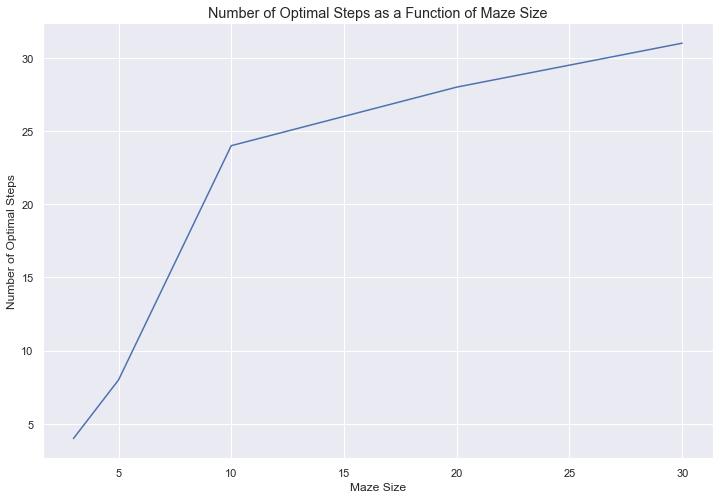

In [75]:
plot_results(maze_episodes, plot_type='steps')

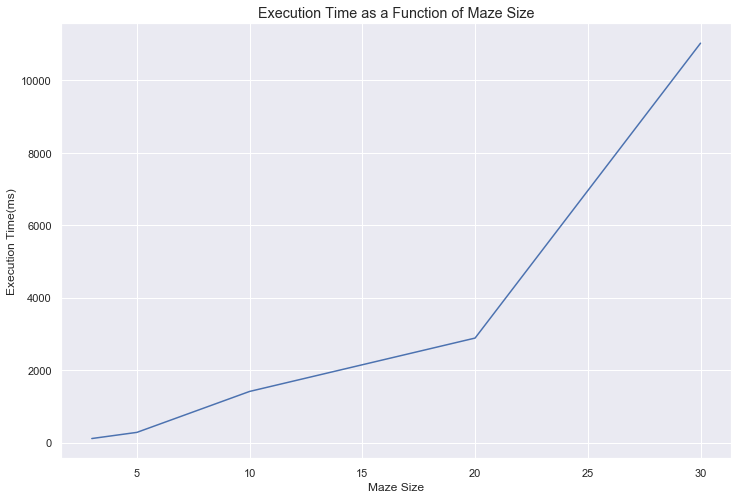

In [66]:
plot_results(maze_episodes, plot_type='exec_time')

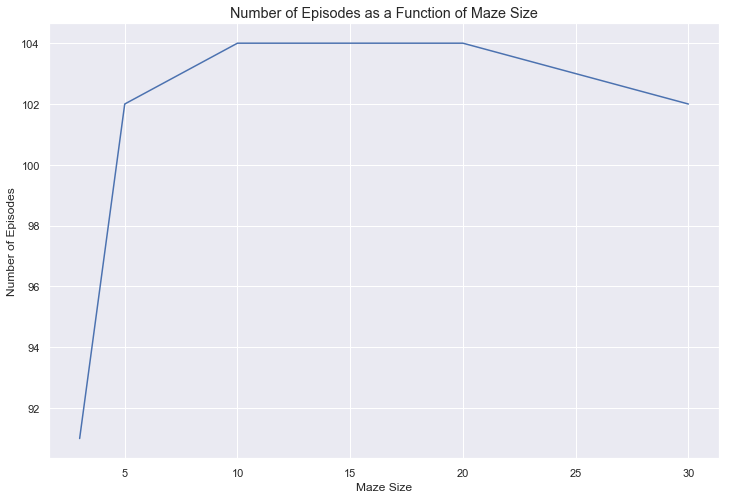

In [65]:
plot_results(maze_episodes, plot_type='episodes')

## References
* Maze environment from: https://github.com/MattChanTK/gym-maze
* Parts of `find_cheese()` function from [OpenAI's](http://gym.openai.com/docs/) documentation